<a href="https://colab.research.google.com/github/Baishnabi17/Customer-chun-prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas


In [ ]:
import numpy as np
import pandas as pd
# set random seed for reproducibility
np.random.seed(34)

# generate synthetic data(1000 samples)
size=np.random.randint(500,5000,1000)
bedrooms=np.random.randint(1,6,1000)
location=np.random.randint(1,11,1000)   # location score(1-10)
age=np.random.randint(1,51,1000)    #age of house in years


# gennerate house price with some noise
price=(size*300)+(bedrooms*50000)+(location*20000)-(age*2000)+np.random.randint(-20000,20000,1000)

# create data frame
df=pd.DataFrame({"Size:":size,"Bedrooms:":bedrooms,"Location:":location,"age:":age,"Price:":price})

# save to csv
csv_filename="house_price_data.csv"
df.to_csv(csv_filename,index=False)


print(f"Dataset saved as'{csv_filename}' with {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset saved as'house_price_data.csv' with 1000 rows and 5 columns.


In [ ]:
import pandas as pd

# load dataset
df=pd.read_csv("house_price_data.csv")

# display first five rows
print(df.head())

   Size:  Bedrooms:  Location:  age:   Price:
0   3989          2          8    31  1406398
1   3038          5          9     8  1306388
2   4330          3         10    33  1600395
3   3657          1          1    35  1099584
4    824          3          4    21   448992


In [ ]:
# check for missing values
print("\nMissing values:\n", df.isnull().sum())

# summary stastistics
print("\nDataset Summary:\n",df.describe())


Missing values:
 Size:        0
Bedrooms:    0
Location:    0
age:         0
Price:       0
dtype: int64

Dataset Summary:
              Size:    Bedrooms:    Location:         age:        Price:
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03
mean   2682.428000     2.908000     5.394000    25.637000  1.006961e+06
std    1313.055219     1.444861     2.920495    14.417111  4.045888e+05
min     501.000000     1.000000     1.000000     1.000000  2.068690e+05
25%    1560.750000     2.000000     3.000000    13.750000  6.757748e+05
50%    2678.000000     3.000000     5.000000    26.000000  1.015126e+06
75%    3760.000000     4.000000     8.000000    38.000000  1.345722e+06
max    4998.000000     5.000000    10.000000    50.000000  1.852333e+06


In [ ]:
# check for missing values
print("\nMissing values:\n", df.isnull().sum())

# summary stastistics
print("\nDataset Summary:\n",df.describe())


Missing values:
 Size:        0
Bedrooms:    0
Location:    0
age:         0
Price:       0
dtype: int64

Dataset Summary:
              Size:    Bedrooms:    Location:         age:        Price:
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03
mean   2682.428000     2.908000     5.394000    25.637000  1.006961e+06
std    1313.055219     1.444861     2.920495    14.417111  4.045888e+05
min     501.000000     1.000000     1.000000     1.000000  2.068690e+05
25%    1560.750000     2.000000     3.000000    13.750000  6.757748e+05
50%    2678.000000     3.000000     5.000000    26.000000  1.015126e+06
75%    3760.000000     4.000000     8.000000    38.000000  1.345722e+06
max    4998.000000     5.000000    10.000000    50.000000  1.852333e+06


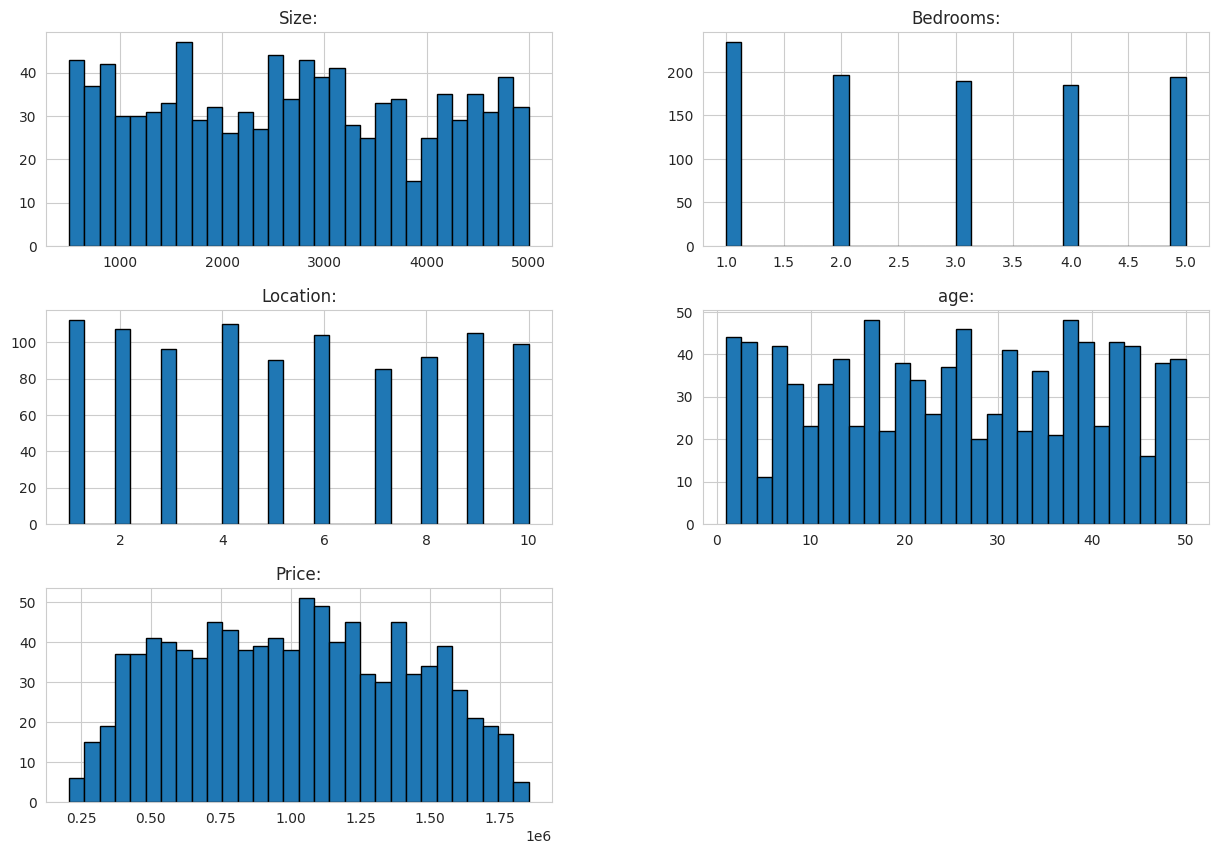

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style
sns.set_style("whitegrid")

# plot features distribution
df.hist(figsize=(15,10), bins=30, edgecolor="black")
plt.tight_layout
plt.show()

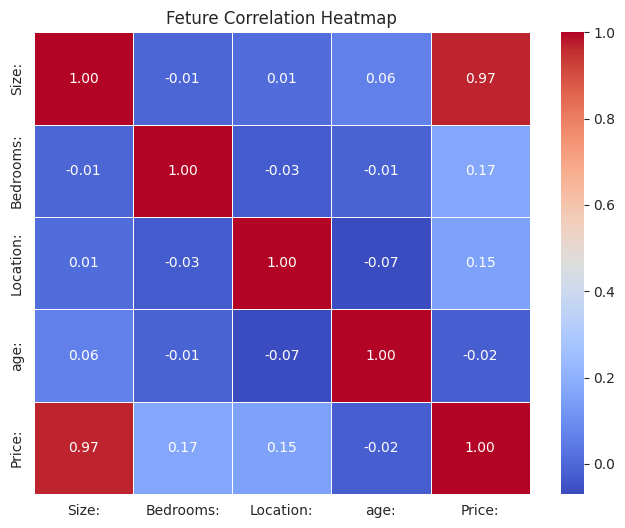

In [ ]:
 #correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Feture Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# select feature &target
x = df[["Size:", "Bedrooms:", "Location:", "age:"]]

y=df["Price:"]

# split data into traing and testing sets

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2 , random_state=42)

# train linera regression
model=LinearRegression()
model.fit(x_train,y_train)

# predictons
y_pred=model.predict(x_test)


# model performance
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"\nModel Performance:\nMAE:{mae:.2f},R2 Score:{r2:.2f}")


Model Performance:
MAE:10232.10,R2 Score:1.00


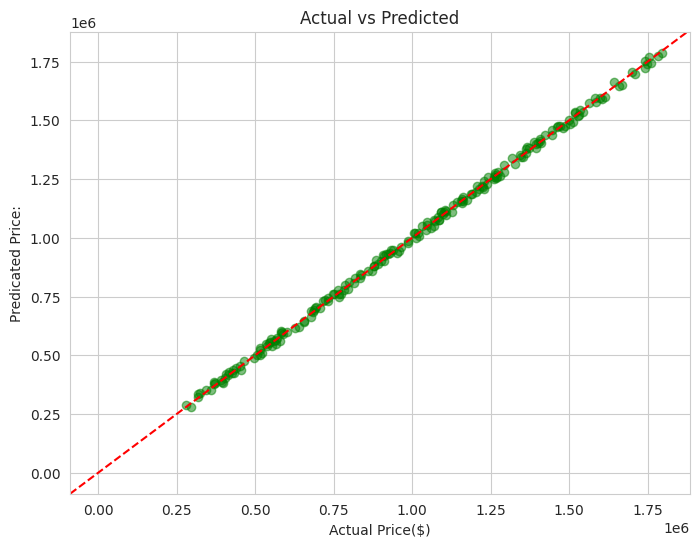

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5,color="green")
plt.xlabel("Actual Price($)")
plt.ylabel("Predicated Price:")
plt.title("Actual vs Predicted")
plt.axline([0,0],slope=1,color="red", linestyle="--")
plt.show()